# Transform Skewed Data

## Skewness and Kurtosis
Briefly, skewness is a measure of symmetry. To be exact, it is a measure of lack of symmetry. This means that the larger the number is the more your data lack symmetry (not normal, that is). Kurtosis, on the other hand, is a measure of whether your data is heavy- or light-tailed relative to a normal distribution.

### How do you handle skewed data in Python?
One way of handling right, or left, skewed data is to carry out the logarithmic transformation on our data. For example, np.log(x) will log transform the variable x in Python. There are other options as well as the Box-Cox and Square root transformations.

## Transformation Methods

### Square Root
The square root method is typically used when your data is `moderately skewed`. Now using the square root (e.g., sqrt(x)) is a transformation that has a moderate effect on distribution shape. It is generally used to `reduce right skewed data` Finally, the square root can be applied on zero values and is most commonly used on counted data.

### Log Transformation
The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for `reducing right skewness`. Worth noting, however, is that it can `not be applied to zero or negative values`.

### Box Cox Transformation
The Box-Cox transformation is, as you probably understand, also a technique to `transform non-normal data into normal shape`. This is a procedure to identify a suitable exponent (Lambda = l) to use to transform skewed data.

### Other Alternatives
Now, the above mentioned transformation techniques are the most commonly used. However, there are plenty of other methods, as well,  that can be used to transform your skewed dependent variables. For example, if your data is of ordinal data type you can also use the `arcsine transformation method`. Another method that you can use is called `reciprocal`. This method, is basically carried out like this: `1/x`, where x is your dependent variable. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu
from scipy.stats import boxcox

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='last'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
df = pd.read_csv('Data_to_Transform.csv')
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.90,2.90,11.18,9.03
1,1.11,2.96,10.84,9.01
2,1.16,2.97,10.82,9.01
3,1.26,3.00,10.76,9.00
4,1.32,3.01,10.75,8.98


## Visually Inspect the Distribution

<AxesSubplot:ylabel='Frequency'>

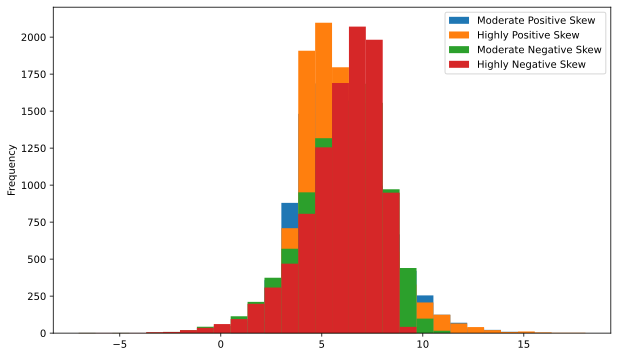

In [3]:
df.plot(kind='hist', bins=30, figsize=(10, 6), grid=False)

(array([ 169., 1348., 2952., 2727., 1679.,  756.,  257.,   79.,   27.,
           6.]),
 array([ 0.89999032,  2.43044299,  3.96089566,  5.49134833,  7.02180099,
         8.55225366, 10.08270633, 11.613159  , 13.14361166, 14.67406433,
        16.204517  ]),
 <BarContainer object of 10 artists>)

(array([1.978e+03, 3.725e+03, 2.397e+03, 1.141e+03, 4.760e+02, 1.860e+02,
        6.200e+01, 2.000e+01, 1.200e+01, 3.000e+00]),
 array([ 2.89507379,  4.41079946,  5.92652513,  7.4422508 ,  8.95797648,
        10.47370215, 11.98942782, 13.50515349, 15.02087916, 16.53660484,
        18.05233051]),
 <BarContainer object of 10 artists>)

(array([2.000e+00, 3.000e+00, 3.000e+01, 1.040e+02, 4.000e+02, 1.211e+03,
        2.669e+03, 3.471e+03, 1.904e+03, 2.060e+02]),
 array([-6.33567897, -4.58403631, -2.83239366, -1.080751  ,  0.67089165,
         2.4225343 ,  4.17417696,  5.92581961,  7.67746227,  9.42910492,
        11.18074757]),
 <BarContainer object of 10 artists>)

(array([2.000e+00, 1.000e+00, 1.000e+01, 4.700e+01, 1.270e+02, 4.000e+02,
        9.480e+02, 2.311e+03, 3.788e+03, 2.366e+03]),
 array([-7.03609125, -5.42973365, -3.82337605, -2.21701846, -0.61066086,
         0.99569674,  2.60205433,  4.20841193,  5.81476953,  7.42112712,
         9.02748472]),
 <BarContainer object of 10 artists>)

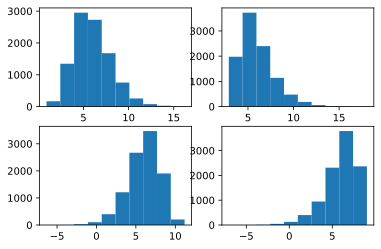

In [4]:
fig=plt.figure()

for i in range(len(df.columns)):
    ax=fig.add_subplot(2, 2, i+1)
    ax.hist(df.iloc[:, i])

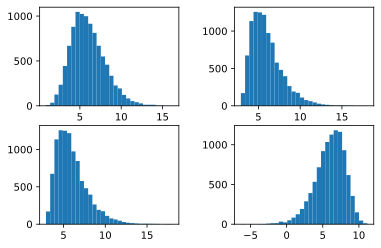

In [5]:
fig, ax=plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.2, wspace=0.4)

for i in range(2):
    for j in range(2):
        ax[i][j].hist(df.iloc[:, i+j], bins=30)
        
plt.show()

## Measures of Skewness and Kurtosis

In [6]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Moderate Positive Skew,0.66,0.58
Highly Positive Skew,1.27,2.41
Moderate Negative Skew,-0.69,0.79
Highly Negative Skew,-1.20,2.09


|	|Skewness|
|:--|:--|
|Fairly Symmetrical|	-0.5 to 0.5|
|Moderate Skewed|	-0.5 to -1.0 and 0.5 to 1.0|
|Highly Skewed|	< -1.0 and > 1.0|

## Square Root Transformation

In [7]:
df.insert(len(df.columns), 'A_Sqrt',
         np.sqrt(df.iloc[:,0]))

<AxesSubplot:ylabel='Frequency'>

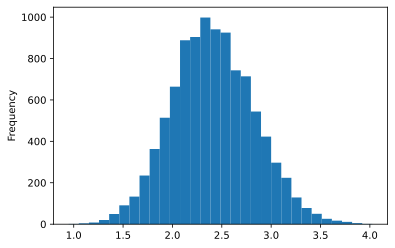

In [8]:
df

df['A_Sqrt'].plot(kind='hist', bins=30)

## Transforming Negatively Skewed Data with the Square Root Method

In [9]:
df.insert(len(df.columns), 'B_Sqrt',
         np.sqrt(max(df.iloc[:, 2]+1) - df.iloc[:, 2]))
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,A_Sqrt,B_Sqrt
0,0.90,2.90,11.18,9.03,0.95,1.00
1,1.11,2.96,10.84,9.01,1.06,1.16
2,1.16,2.97,10.82,9.01,1.08,1.17
3,1.26,3.00,10.76,9.00,1.12,1.19
4,1.32,3.01,10.75,8.98,1.15,1.19


<AxesSubplot:ylabel='Frequency'>

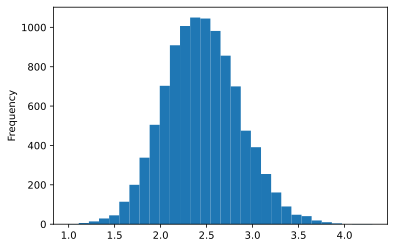

In [10]:
df['B_Sqrt'].plot(kind='hist', bins=30)

## Log Transformation

In [11]:
df.insert(len(df.columns), 'C_log',
         np.log(df['Highly Positive Skew']))

In [12]:
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,A_Sqrt,B_Sqrt,C_log
0,0.90,2.90,11.18,9.03,0.95,1.00,1.06
1,1.11,2.96,10.84,9.01,1.06,1.16,1.09
2,1.16,2.97,10.82,9.01,1.08,1.17,1.09
3,1.26,3.00,10.76,9.00,1.12,1.19,1.10
4,1.32,3.01,10.75,8.98,1.15,1.19,1.10


<AxesSubplot:ylabel='Frequency'>

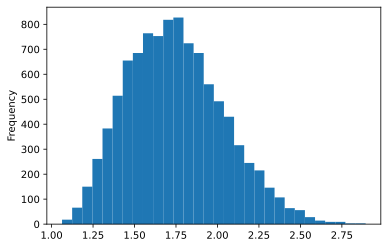

In [13]:
df['C_log'].plot(kind='hist', bins=30)

## Log Transforming Negatively Skewed Data

In [14]:
df.insert(len(df.columns), 'D_log',
         np.log(max(df.iloc[:, 2] + 1) - df.iloc[:, 2]))

In [15]:
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,A_Sqrt,B_Sqrt,C_log,D_log
0,0.90,2.90,11.18,9.03,0.95,1.00,1.06,0.00
1,1.11,2.96,10.84,9.01,1.06,1.16,1.09,0.29
2,1.16,2.97,10.82,9.01,1.08,1.17,1.09,0.31
3,1.26,3.00,10.76,9.00,1.12,1.19,1.10,0.35
4,1.32,3.01,10.75,8.98,1.15,1.19,1.10,0.36


<AxesSubplot:ylabel='Frequency'>

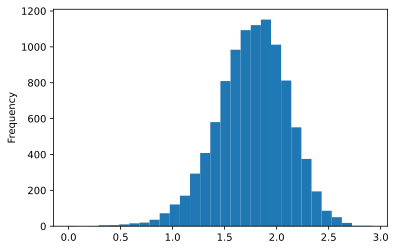

In [16]:
df['D_log'].plot(kind='hist', bins=30)

## Box-Cox Transformation

In [17]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df.insert(len(df.columns), 'A_Boxcox', 
              boxcox(df.iloc[:, 0])[0])

In [18]:
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,A_Sqrt,B_Sqrt,C_log,D_log,A_Boxcox
0,0.90,2.90,11.18,9.03,0.95,1.00,1.06,0.00,-0.10
1,1.11,2.96,10.84,9.01,1.06,1.16,1.09,0.29,0.11
2,1.16,2.97,10.82,9.01,1.08,1.17,1.09,0.31,0.15
3,1.26,3.00,10.76,9.00,1.12,1.19,1.10,0.35,0.24
4,1.32,3.01,10.75,8.98,1.15,1.19,1.10,0.36,0.29


In [19]:
boxcox(df.iloc[:, 0])

(array([-0.10343202,  0.10962841,  0.14950194, ...,  4.58578786,
         4.58714145,  4.74455838]),
 0.35366969963947187)

<AxesSubplot:ylabel='Frequency'>

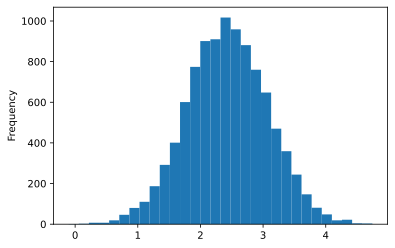

In [20]:
df['A_Boxcox'].plot(kind='hist', bins=30)

In [21]:
df.agg(['skew']).transpose()

,skew
Moderate Positive Skew,0.66
Highly Positive Skew,1.27
Moderate Negative Skew,-0.69
Highly Negative Skew,-1.20
A_Sqrt,0.15
B_Sqrt,0.18
C_log,0.40
D_log,-0.36
A_Boxcox,0.00
